<a href="https://colab.research.google.com/github/sruby8/uplift.ai/blob/master/X_Factor_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

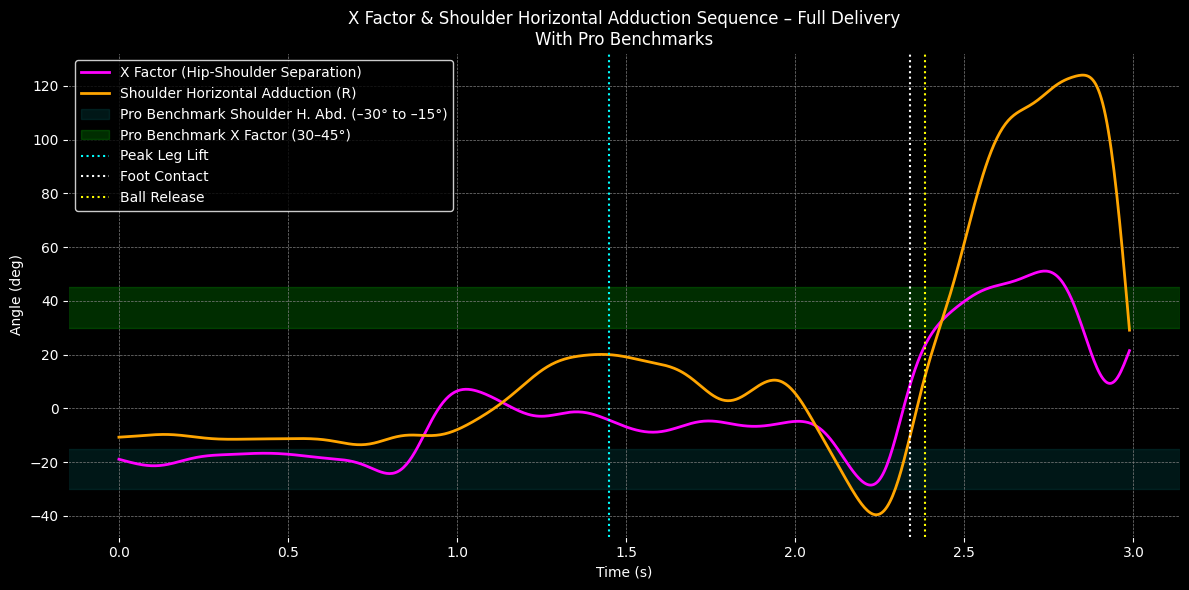

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Set file path to your uploaded mocap CSV
file_path = "/content/uplift_data_export_20250610181607.csv"  # CHANGE THIS LINE

# 2. Load data
data = pd.read_csv(file_path)

# 3. Compute X factor
if "trunk_global_rotation" in data.columns and "pelvis_global_rotation" in data.columns:
    data["x_factor"] = data["trunk_global_rotation"] - data["pelvis_global_rotation"]
else:
    data["x_factor"] = np.nan

# 4. Event timings (peak leg lift, foot contact, ball release)
pll = data[data["max_knee_raise_frame"] == 0]["time"].min() if "max_knee_raise_frame" in data else None
fc = data[data["foot_contact_frame"] == 0]["time"].min() if "foot_contact_frame" in data else None
br = data[data["ball_release_frame"] == 0]["time"].min() if "ball_release_frame" in data else None

# 5. Handedness and correct shoulder column
if "handedness" in data.columns:
    handed = str(data["handedness"].iloc[0]).lower()
else:
    handed = "right"  # default

if handed.startswith("l") and "left_shoulder_horizontal_adduction" in data.columns:
    shoulder_col = "left_shoulder_horizontal_adduction"
    shoulder_label = "Shoulder Horizontal Adduction (L)"
elif "right_shoulder_horizontal_adduction" in data.columns:
    shoulder_col = "right_shoulder_horizontal_adduction"
    shoulder_label = "Shoulder Horizontal Adduction (R)"
else:
    shoulder_col = None
    shoulder_label = "Shoulder Horizontal Adduction (N/A)"

# 6. Plot
plt.figure(figsize=(12, 6), facecolor="black")
ax = plt.gca()
ax.set_facecolor("black")

plt.plot(data["time"], data["x_factor"], color="magenta", linewidth=2, label="X Factor (Hip-Shoulder Separation)")
if shoulder_col is not None:
    plt.plot(data["time"], data[shoulder_col], color="orange", linewidth=2, label=shoulder_label)
    plt.axhspan(-30, -15, color="teal", alpha=0.18, label="Pro Benchmark Shoulder H. Abd. (–30° to –15°)")
    plt.axhspan(30, 45, color="lime", alpha=0.18, label="Pro Benchmark X Factor (30–45°)")


if pll is not None:
    plt.axvline(x=pll, color="cyan", linestyle="dotted", label="Peak Leg Lift")
if fc is not None:
    plt.axvline(x=fc, color="white", linestyle="dotted", label="Foot Contact")
if br is not None:
    plt.axvline(x=br, color="yellow", linestyle="dotted", label="Ball Release")

plt.xlabel("Time (s)", color="white")
plt.ylabel("Angle (deg)", color="white")
plt.title("X Factor & Shoulder Horizontal Adduction Sequence – Full Delivery\nWith Pro Benchmarks", color="white")
plt.tick_params(colors="white")
plt.grid(True, color="gray", linestyle="--", linewidth=0.5)
plt.legend(facecolor="black", edgecolor="white", labelcolor="white", fontsize=10)
plt.tight_layout()
plt.show()